In [1]:
from datasets import load_dataset

ds = load_dataset("Bingsu/Cat_and_Dog")

README.md:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/753 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/182M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/45.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [3]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp310-cp310-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.7 MB/s eta 0:00:009.4 MB/s eta 0:00:01
Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl (65 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


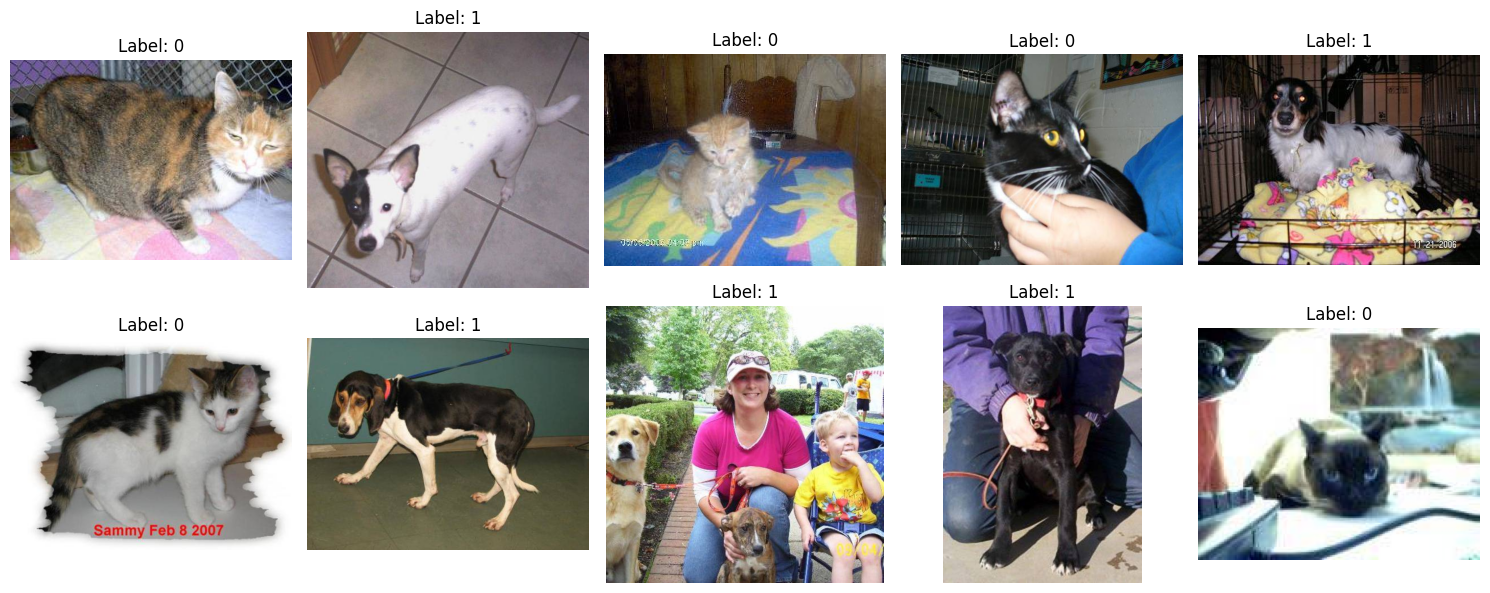

In [4]:
import random

import matplotlib.pyplot as plt

# Select 10 random indices
random_indices = random.sample(range(len(ds['train'])), 10)

# Plot the images with labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, idx in zip(axes.flatten(), random_indices):
    image = ds['train'][idx]['image']
    label = ds['train'][idx]['labels']
    ax.imshow(image)
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Create a subset of the training and testing data
train_subset = ds['train'].select(range(100))
test_subset = ds['test'].select(range(20))

print(f"Training subset size: {len(train_subset)}")
print(f"Testing subset size: {len(test_subset)}")

Training subset size: 100
Testing subset size: 20


In [7]:
# Function to switch labels
def switch_labels(example):
    example['labels'] = 1 if example['labels'] == 0 else 0
    return example

# Apply the function to both subsets
train_subset = train_subset.map(switch_labels)
test_subset = test_subset.map(switch_labels)

# Verify the changes
print(train_subset['labels'][:10])
print(test_subset['labels'][:10])

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
import base64
from io import BytesIO

def image_to_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

# Add base64 representations to the train subset
train_subset = train_subset.map(lambda example: {**example, 'image_base64': image_to_base64(example['image'])})

# Add base64 representations to the test subset
test_subset = test_subset.map(lambda example: {**example, 'image_base64': image_to_base64(example['image'])})

# Verify the changes
print(train_subset[0]['image_base64'][:100])  # Print the first 100 characters of the base64 string
print(test_subset[0]['image_base64'][:100])  # Print the first 100 characters of the base64 string

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx
/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx
